In [2]:
from ase.build import bulk
from pyiron_workflow_atomistics.dataclass_storage import CalcInputMinimize
from pyiron_workflow_atomistics.bulk import optimise_cubic_lattice_parameter
from pyiron_workflow_lammps.engine import LammpsEngine
from pyiron_workflow import Workflow

%load_ext autoreload
%autoreload 2

# Example for LAMMPS engine

In [ ]:
inp = CalcInputMinimize()
inp.relax_cell = False
Engine = LammpsEngine(EngineInput = inp)

Engine.working_directory = "test_opt_cubic_cell"
# Adjust this line to match your LAMMPS installation
# If you are using conda-lammps or a LAMMPS binary on your system, you can use directly:
Engine.command = "lmp -in in.lmp -log minimize.log"
Engine.lammps_log_filepath = "minimize.log"
Engine.input_script_pair_style = "eam/fs"
Engine.path_to_model = "Al-Fe_eam.fs"
# /root/github_dev/pyiron_workflow_atomistics/pyiron_workflow_atomistics
structure = bulk("Fe", a=2.828, cubic=True)
wf1 = Workflow(Engine.working_directory, delete_existing_savefiles=True)
wf1.opt_cubic_cell = optimise_cubic_lattice_parameter(
    structure=structure,
    name="Fe",
    crystalstructure="bcc",
    calculation_engine=Engine,
    parent_working_directory="opt_cubic_cell",
    rattle=0.1,
    strain_range=(-0.02, 0.02),
    num_points=6,
)
wf1.run()


2025-09-23 19:17:07,081 - pyiron_log - WARNING - Directory 'test_opt_cubic_cell/strain_000' already exists. Existing files may be overwritten.
2025-09-23 19:17:07,211 - pyiron_log - WARNING - Directory 'test_opt_cubic_cell/strain_001' already exists. Existing files may be overwritten.


current mode  minimize


2025-09-23 19:17:07,352 - pyiron_log - WARNING - Directory 'test_opt_cubic_cell/strain_002' already exists. Existing files may be overwritten.
2025-09-23 19:17:07,500 - pyiron_log - WARNING - Directory 'test_opt_cubic_cell/strain_003' already exists. Existing files may be overwritten.
2025-09-23 19:17:07,638 - pyiron_log - WARNING - Directory 'test_opt_cubic_cell/strain_004' already exists. Existing files may be overwritten.
2025-09-23 19:17:07,781 - pyiron_log - WARNING - Directory 'test_opt_cubic_cell/strain_005' already exists. Existing files may be overwritten.


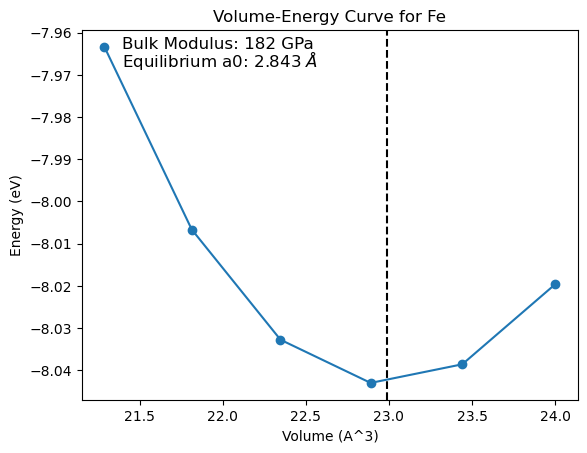

In [4]:
from matplotlib import pyplot as plt

plt.plot(wf1.opt_cubic_cell.outputs.volumes.value ,wf1.opt_cubic_cell.outputs.energies.value, marker="o")
plt.axvline(wf1.opt_cubic_cell.outputs.equil_volume_per_atom.value * len(wf1.opt_cubic_cell.outputs.equil_struct.value), color="k", linestyle="--")
plt.xlabel("Volume (A^3)")
plt.ylabel("Energy (eV)")
plt.title("Volume-Energy Curve for Fe")
plt.text(0.08, 0.95, f"Bulk Modulus: {wf1.opt_cubic_cell.outputs.B.value:.0f} GPa", fontsize=12, transform=plt.gca().transAxes)
plt.text(0.08, 0.90, rf"Equilibrium a0: {wf1.opt_cubic_cell.outputs.a0.value:.3f} $\AA$", fontsize=12, transform=plt.gca().transAxes)
plt.show()

